# Decision Tree Regression

課程範例程式及資料檔下載網址： https://www.superdatascience.com/machine-learning/

## Importing the Libraries 載入套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Importing the Dataset 讀入資料

利用 pd.read_csv 來載入資料，這組資料是一個 10 列(row) 3 行(column) 職稱位階與薪資的資料，其中共包含了 10 個位階的資訊。

In [2]:
path = '/Users/hsinyu/Desktop/Decision_Tree_Regression/'
dataset = pd.read_csv( path+'Position_Salaries.csv' )

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Dependent & independent variables 定義解釋變數及反應變數

In [4]:
X = dataset.iloc[:, 1:2].values 
y = dataset.iloc[:, 2].values

>[Note] <br>
> 1. Independent Variable 的部分只會用到 Level 
> 2. 使用 `dataset.iloc[:, 1:2].values ` 而不是 `dataset.iloc[:, 1].values` 的原因是因為待會建立模型時，X 必須是 Matrix 而非Vector

## Decision Tree Regression Intuition

> [Note] <br><br>
> **決策樹 (Decision Tree)**<br>
決策樹是用來處理分類問題的樹狀結構，使用方法為:選出分類能力最好的屬性做為樹的內部節點，將內部節點的所有不同資料產生出對應的分支，遞迴重複上面的過程直到滿足終止條件，ID3、C4.5 、C5.0、CHAID及CART是決策樹演算法的代表。

> Reference：http://mropengate.blogspot.tw/2015/06/ai-ch13-2-decision-tree.html

#### Decision Tree Regression 迴歸樹
可以利用 CART(Classification and regression tree) 這個演算法來建立迴歸樹
<br><br>
> [Note] <br>
> 1. CART 是一種產生二元樹的技術 ( 在每一個節點上都是採用二分法，也就是一次只能夠有兩個子節點 ) ，以吉尼係數(Gini index)做為選擇屬性的依據。
<br><br>
> 2. 在 CART 中，可以依照 反應變數 $y$ 分成兩種：
  1. $y$ 是類別 ： Classification tree
  2. $y$ 是連續 ： Regression tree 


#### Decision Tree Regression 建立的流程
**Step1.** 將解釋變數的部分依照 CART 切分方式分開

![](plot_2_5_1.png)

**Step2.** 找出每個點對應的反應變數值 ( $y$ ) ，依照切分的組別將同一組的 $y$ 取平均，得到該組的 $\bar{y}$ <br>
**Step3.** 假設有一個新的資料，先依據 **Step1.** 的分組規則分組，得到組別後給予該組的 $\bar{y}$，即為對該新資料的預測值 $\hat{y}$

![](plot_2_5_2.png)

<div class="alert alert-danger" role="alert">
  <strong>Exercise!</strong>
</div>
有一名 Level=6.5 的員工，宣稱他的年薪要 16 萬，可以利用 Decision Tree Regression 迴歸樹歸來驗證他說的話是否誠實

## Splitting the dataset into the Training set and Test set 切分訓練及測試樣本

因為這個 dataset 只有 10 筆觀測值，若硬要做切分訓練及測試樣本那麼會不夠資訊來建立模型，因此不建議做切分訓練及測試樣本。

## Fitting Decision Tree Regression to the Training set

In [5]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

> [Note] DecisionTreeRegressor 相關參數
> 1.  max_depth：樹的深度，Default=None 表示盡可能展開分枝，且每個節點那內的樣本數都達到最小分枝的樣本數(min_samples_split)
> 2.  min_samples_split：最小分枝的樣本數(最少要有多少樣本數才能進行分支)
> 3.  min_samples_leaf：最小節點樣本數(單一個節點最少要有多少樣本)
> 4.  random_state：隨機種子
> 5.  min_impurity_decrease：停止分支的門檻值
> 6.  presort：是否要預排序

> Reference：http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

## Visualising the Decision Tree Regression results

<IPython.core.display.Javascript object>


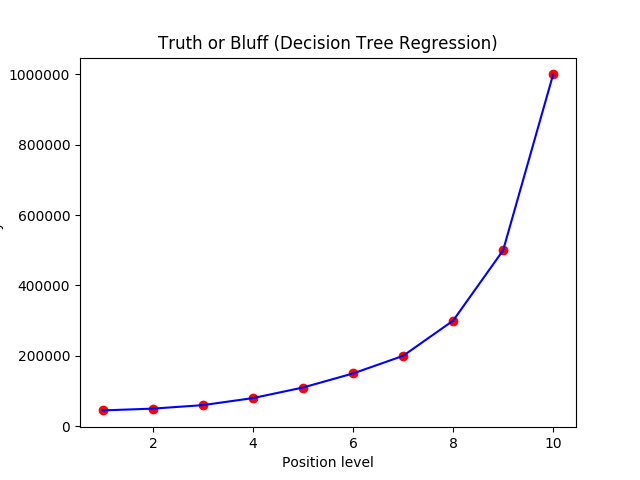

In [6]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

> [Note]
> 1. 依照上面 Decision Tree Regression 的理論介紹這樣的圖畫出來應該是錯的，因為應該是一段區間代表同樣的 $y$ 值
> 2. 這樣的寫法是適合連續型態，因此並<span style="color:red">不適用</span>於 Decision Tree Regression

<IPython.core.display.Javascript object>


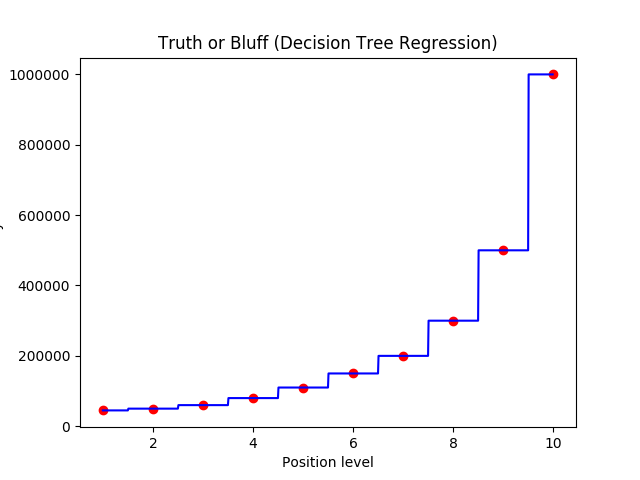

In [7]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

> [Note]
> 1. 把 $X$ 切成很多個資料點，再分別去 fit Model，這樣就能更突顯一段間隔 ( 同一組 $X$ ) 預測出來會是同一個 $y$ 值

# Predicting a new result with Decision Tree Regression

In [8]:
regressor.predict(6.5)

array([ 150000.])

<div class="alert alert-success" role="alert">
  <strong>Answer!</strong>
</div>
利用 Decision Tree Regression 預測 level=6.5 的年薪有 15 萬年薪